## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

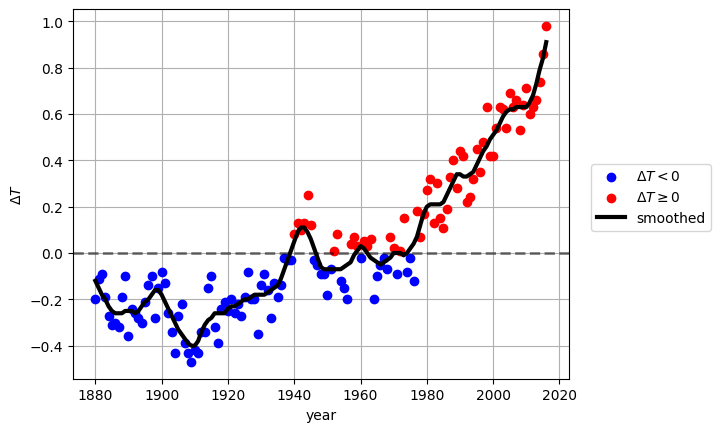

In [8]:
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.axisbelow'] = True

data = request.urlopen("https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt")
year, deltaT, smoothed = np.loadtxt(data).transpose()

lzero, geqzero = np.where(deltaT<0), np.where(deltaT>=0)

plt.axhline(0, lw=2, ls="--", c="black", alpha=0.5)
plt.scatter(year[lzero], deltaT[lzero], c="blue", label="$\Delta T<0$")
plt.scatter(year[geqzero], deltaT[geqzero], c="red", label="$\Delta T\geq 0$")
plt.plot(year, smoothed, c="black", lw=3, label="smoothed")

plt.xlabel("year")
plt.ylabel("$\Delta T$")
plt.grid()
plt.legend(bbox_to_anchor=(1.3, 0.6));

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


In [82]:
N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

In [83]:
c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)

for i in range(10):
    z = z**2 + c

m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

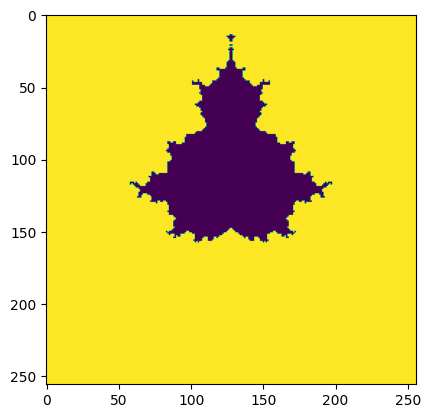

In [84]:
fig, ax = plt.subplots()
ax.imshow(m)

In [97]:
N = 256
depth = 10

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
xv, yv = np.meshgrid(x, y, indexing="ij")
c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)
m = np.zeros((N, N))

for idx, zval in np.ndenumerate(z):
    for i in range(depth):
        zval = zval**2 + c[idx]
        if np.abs(zval) > 2:
            m[idx[0], idx[1]] = i
            break

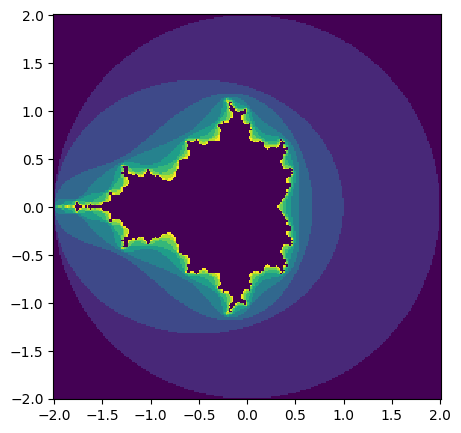

In [98]:
fig, ax = plt.subplots(figsize=(5,5))
cbar = ax.pcolormesh(xv, yv, m)
